In [27]:
import sys
print(sys.path)

['/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/droidmaldetect_py/Dataset2017/notebook', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/.venv/lib/python3.11/site-packages']


In [33]:
import pandas as pd
import os
import dotenv
dotenv.load_dotenv()


True

In [34]:
# TODO: Columns that can be removed for column correlation analysis
# TODO: The initial version may change due to the relationship between the variables

datasets_malware = [
    {"path": ["dataset/2017_dataset/Adware"], "class":"Adware"},
    {"path": ["dataset/2017_dataset/Benign"], "class":"Benign"},
    {"path": ["dataset/2017_dataset/Ransomware"], "class":"Ransomware"},
    {"path": ["dataset/2017_dataset/Scareware"], "class":"Scareware"},
    {"path": ["dataset/2017_dataset/SMSmalware"], "class":"SMSmalware"},
]

In [35]:
abs_path_result = os.getenv('FOLDER_RESULT')
categories =  ["".join([category['class'].upper(), '.csv']) for category in datasets_malware]
column_to_delete = ["Flow ID", "Source IP", "Destination IP", "Timestamp", "Label"]
dataframe_general =  pd.DataFrame()
categories

['ADWARE.csv',
 'BENIGN.csv',
 'RANSOMWARE.csv',
 'SCAREWARE.csv',
 'SMSMALWARE.csv']

In [36]:
for category in categories:
    csv_path = os.path.join(abs_path_result, category)
    temp_dataframe: pd.DataFrame =  pd.read_csv(csv_path, index_col=False)
    temp_dataframe.drop(column_to_delete, inplace=True, errors='ignore')
    print(category)
    temp_dataframe['category'] = 1 if 'BENIGN' in category else 0
    dataframe_general =  pd.concat([dataframe_general, temp_dataframe])

ADWARE.csv
BENIGN.csv
RANSOMWARE.csv
SCAREWARE.csv
SMSMALWARE.csv


<Axes: >

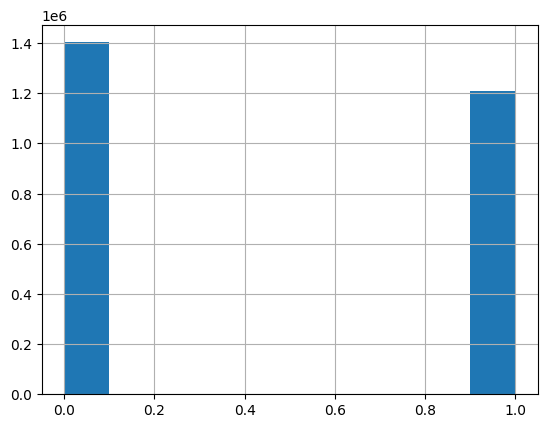

In [37]:
dataframe_general['category'].hist()

In [38]:
dataframe_general.to_csv(os.path.join(abs_path_result, 'general_malware.csv'))